# Decode Thetis Log Files
This script will demonstrate how we can decode the binary log files generated by the Thetis instrumentation package and display them for analysis

Author: Braidan Duffy  
Date Published: 2022-11-20  
Version: 1.0.0  
Date Updated:  

## Changelog
### Version 1.0.0 - 2022-11-20
Initial Release

In [2]:
# Import relevant libraries
from ctypes import *
import matplotlib.pyplot as plt
import datetime as DT

Thetis uses a known data structure that stores all of the measured and calculated data within set memory boundaries. This structure is written to the log file sequentially, so if we can define the structure here and determine how big each "block" of data is, we can parse the data log for the appropriate values.

In [3]:
class ThetisData(Structure):
    _fields_ = [('epoch', c_long),
                ('mSecond', c_ulong),
                ('GPSYear', c_uint16),
                ('GPSMonth', c_uint8),
                ('GPSDay', c_uint8),
                ('GPSHour', c_uint8),
                ('GPSMinute', c_uint8),
                ('GPSSecond', c_uint8),
                ('GPSHundredth', c_uint8),
                ('voltage', c_float),
                ('GPSFix', c_bool),
                ('numSats', c_uint8),
                ('HDOP', c_uint8),
                ('latitude', c_long),
                ('longitude', c_long),
                ('GPSSpeed', c_long),
                ('GPSCourse', c_long),
                ('sysCal', c_uint8),
                ('gyroCal', c_uint8),
                ('accelCal', c_uint8),
                ('magCal', c_uint8),
                ('rawAccelX', c_float),
                ('rawAccelY', c_float),
                ('rawAccelZ', c_float),
                ('accelX', c_float),
                ('accelY', c_float),
                ('accelZ', c_float),
                ('rawGyroX', c_float),
                ('rawGyroY', c_float),
                ('rawGyroZ', c_float),
                ('gyroX', c_float),
                ('gyroY', c_float),
                ('gyroZ', c_float),
                ('rawMagX', c_float),
                ('rawMagY', c_float),
                ('rawMagZ', c_float),
                ('magX', c_float),
                ('magY', c_float),
                ('magZ', c_float),
                ('roll', c_float),
                ('pitch', c_float),
                ('yaw', c_float),
                ('linAccelX', c_float),
                ('linAccelY', c_float),
                ('linAccelZ', c_float),
                ('quatW', c_float),
                ('quatX', c_float),
                ('quatY', c_float),
                ('quatZ', c_float),
                ('imuTemp', c_float),
                ('state', c_uint8)]

Now, we can read in the log file and parse it - pulling out whatever data points we need and storing them into lists that we can access later during plotting.

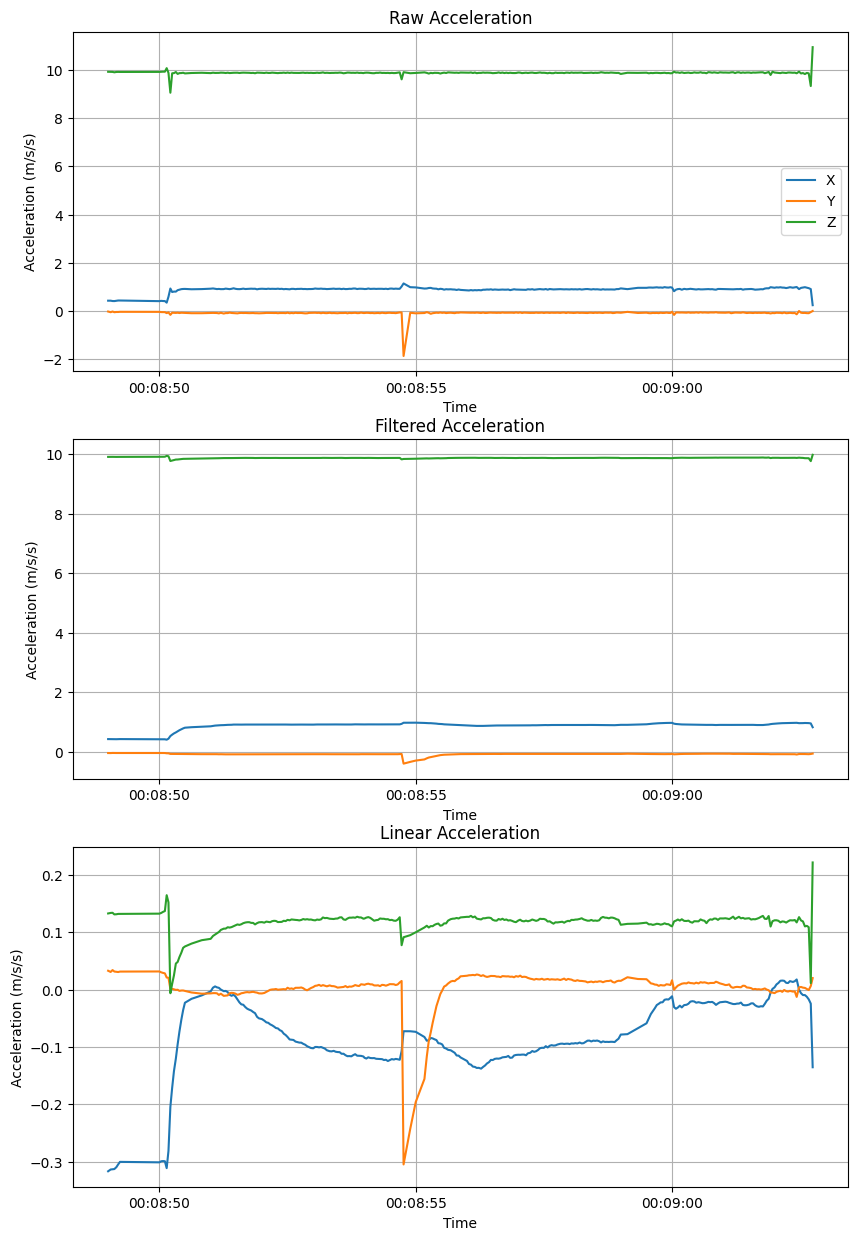

In [12]:
with open('data/log_003.bin', 'rb') as file:
    epoch_data = []
    raw_accel_data = []
    accel_data = []
    lin_accel_data = []

    x = ThetisData()
    while file.readinto(x) == sizeof(x):
        timestamp = DT.datetime.utcfromtimestamp(x.epoch) + DT.timedelta(milliseconds=x.mSecond)
        epoch_data.append(timestamp)
        raw_accel_data.append((x.rawAccelX, x.rawAccelY, x.rawAccelZ))
        accel_data.append((x.accelX, x.accelY, x.accelZ))
        lin_accel_data.append((x.linAccelX, x.linAccelY, x.linAccelZ))

fig, ax = plt.subplots(3)
ax[0].plot(epoch_data, raw_accel_data)
ax[1].plot(epoch_data, accel_data)
ax[2].plot(epoch_data, lin_accel_data)

ax[0].set(xlabel='Time', ylabel='Acceleration (m/s/s)',
       title='Raw Acceleration')
ax[1].set(xlabel='Time', ylabel='Acceleration (m/s/s)',
       title='Filtered Acceleration')
ax[2].set(xlabel='Time', ylabel='Acceleration (m/s/s)',
       title='Linear Acceleration')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].legend(["X", "Y", "Z"])

fig.set_figwidth(10)
fig.set_figheight(15)

# fig.savefig("test.png")
plt.show()